In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tdl-project-dataset-merged/merged_data.csv


In [27]:
# Imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.losses import MeanAbsoluteError
import matplotlib.pyplot as plt

In [28]:
# Load the dataset
data = pd.read_csv('/kaggle/input/tdl-project-dataset-merged/merged_data.csv')

In [29]:
# Impute missing numeric values with the average of neighboring values
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Neutral', 'Negative', 'Positive']
data[numeric_cols] = data[numeric_cols].fillna(method='ffill')

# Impute missing values in the "Titles" column
data['Titles'] = data['Titles'].fillna('.')

/tmp/ipykernel_34/1668353209.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[numeric_cols] = data[numeric_cols].fillna(method='ffill')


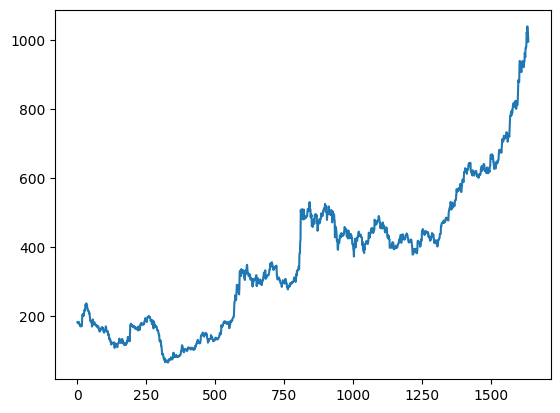

In [30]:
# Separating close prices so that I can plot a graph
df_close = data['Close']

# Plot the Closing prices
plt.plot(df_close)

In [31]:
# Normalize the features since LSTM is very sensitive to scale
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[numeric_cols])

In [32]:
# Define the window size for sequences
window_size = 10

# Generate sequences of data for better training
def generate_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size][3])  # Close price is at index 3
    return np.array(X), np.array(y)

X, y = generate_sequences(data_scaled, window_size)

In [40]:
# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [34]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(window_size, len(numeric_cols))))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
# Compile the model
model.compile(optimizer='adam', loss=MeanAbsoluteError())

model.fit(X_train, y_train, epochs=200, batch_size=32)

Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0944
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0289
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0276
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0257
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0227
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0225
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0208
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0229
Epoch 9/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0210
Epoch 10/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0199
Epoch 11/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0201
Epoch 12/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0192
Epoch 13/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0203
Epoch 14/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0199
Epoch 15/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0197
Epoc

In [36]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

print(f'Training Loss: {train_loss}')
print(f'Testing Loss: {test_loss}')

Training Loss: 0.005842595361173153
Testing Loss: 0.09038423746824265


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


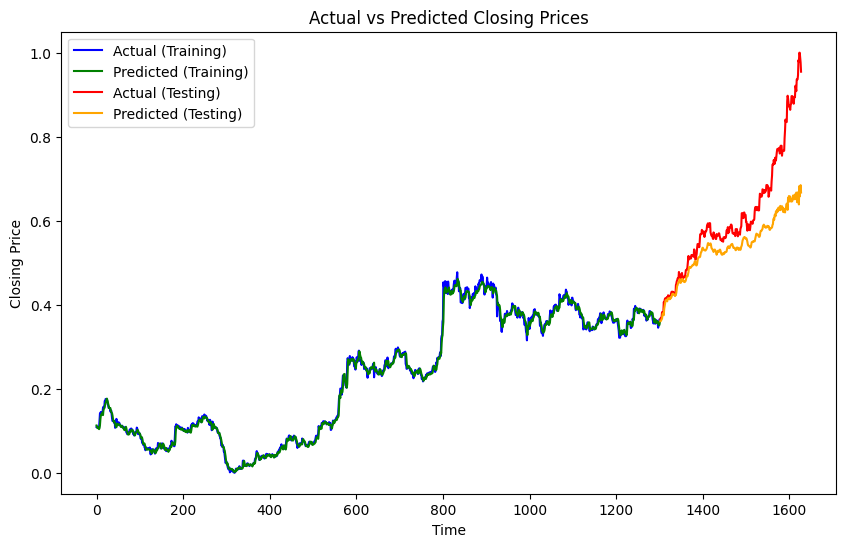

In [42]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Create x-axis values for training and testing data
x_train = np.arange(len(y_train))
x_test = np.arange(len(y_train), len(y_train) + len(y_test))

# Plot actual vs predicted values for training and testing data
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Actual (Training)')
plt.plot(x_train, y_train_pred, color='green', label='Predicted (Training)')
plt.plot(x_test, y_test, color='red', label='Actual (Testing)')
plt.plot(x_test, y_pred, color='orange', label='Predicted (Testing)')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()
